<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/CNN/notebooks/09_12_%E8%87%89%E9%83%A8%E7%89%B9%E5%BE%B5%E9%BB%9E%E5%81%B5%E6%B8%AC_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用OpenCV套件進行臉部特徵點偵測

## 載入相關套件

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app
%cd /app/DL_Book/src

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/app/My Drive': Input/output error
/content/gdrive/My Drive/DL_Book/src


In [3]:
# 解除安裝套件： pip uninstall opencv-python opencv-contrib-python
# 安裝套件：    pip install opencv-contrib-python
# 載入相關套件
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 載入並顯示圖檔

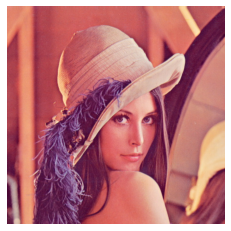

In [4]:
# 載入圖檔
image_file = "../images_Object_Detection/lena.jpg"
image = cv2.imread(image_file)

# 顯示圖像
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.axis('off')
plt.show()

## 偵測臉部特徵點並顯示

In [5]:
# 偵測臉部
cascade = cv2.CascadeClassifier("../cascade_files/haarcascade_frontalface_alt2.xml")
faces = cascade.detectMultiScale(image , 1.5, 5)
print("faces", faces)

# 建立臉部特徵點偵測的物件
facemark = cv2.cv2.face.createFacemarkLBF()
# 訓練模型 lbfmodel.yaml 下載自： 
# https://raw.githubusercontent.com/kurnianggoro/GSOC2017/master/data/lbfmodel.yaml
facemark .loadModel("../data/lbfmodel.yaml")
# 偵測臉部特徵點
ok, landmarks1 = facemark.fit(image , faces)
print ("landmarks LBF", ok, landmarks1)

faces [[225 205 152 152]]
landmarks LBF True [array([[[201.31314, 268.08807],
        [201.5153 , 293.1106 ],
        [204.91422, 317.07196],
        [210.71988, 340.4278 ],
        [222.97098, 360.37122],
        [240.34521, 375.51422],
        [260.10678, 386.35587],
        [280.64197, 392.04227],
        [298.6573 , 390.89835],
        [311.434  , 384.88406],
        [318.37827, 371.23538],
        [324.82266, 357.113  ],
        [331.87363, 342.1786 ],
        [339.7072 , 327.1501 ],
        [346.04462, 311.9719 ],
        [349.2847 , 296.59448],
        [348.95883, 280.12585],
        [236.43172, 252.06743],
        [251.37927, 245.06682],
        [268.54245, 242.64853],
        [284.97516, 247.29442],
        [299.09363, 255.40219],
        [326.43286, 255.8234 ],
        [334.87848, 249.93437],
        [343.76285, 246.57608],
        [352.36066, 246.1333 ],
        [356.09622, 253.07555],
        [312.4146 , 268.7993 ],
        [314.42938, 283.27505],
        [317.071  , 297.70

## 繪製特徵點並顯示圖像

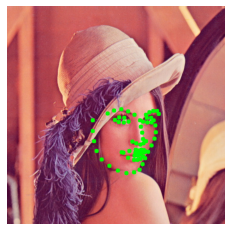

In [6]:
# 繪製特徵點
for p in landmarks1[0][0]:
    cv2.circle(image, tuple(p), 5, (0, 255, 0), -1)
    
# 顯示圖像
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.axis('off')
plt.show()

## 使用FacemarkAAM偵測臉部特徵點

In [7]:
# 建立臉部特徵點偵測的物件
facemark = cv2.face.createFacemarkAAM()
# 訓練模型 aam.xml 下載自： 
# https://github.com/berak/tt/blob/master/aam.xml
facemark.loadModel("../data/aam.xml")
# 偵測臉部特徵點
ok, landmarks2 = facemark.fit(image , faces)
print ("Landmarks AAM", ok, landmarks2)

Landmarks AAM True [array([[[226.08101, 244.54762],
        [231.09694, 260.7153 ],
        [218.0278 , 271.96198],
        [235.96924, 282.07126],
        [255.0106 , 289.26627],
        [254.34108, 306.0417 ],
        [268.02826, 290.7257 ],
        [271.10104, 283.922  ],
        [282.4268 , 281.04532],
        [289.2055 , 315.10043],
        [302.33798, 284.6571 ],
        [318.24017, 271.21112],
        [311.90976, 255.91621],
        [312.34326, 241.22672],
        [298.42157, 226.958  ],
        [294.22888, 206.90152],
        [309.22122, 208.57109],
        [204.49117, 229.53513],
        [212.62088, 208.02849],
        [207.1117 , 221.66689],
        [214.9499 , 198.71277],
        [223.32709, 198.07289],
        [233.95285, 201.53055],
        [244.70615, 183.8256 ],
        [254.17233, 179.86957],
        [266.81848, 199.7889 ],
        [288.56036, 204.25746],
        [233.72382, 213.98817],
        [236.97984, 227.76003],
        [240.00163, 233.98996],
        [242.44281, 

## 繪製特徵點並顯示圖像

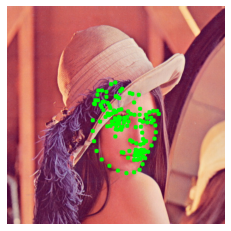

In [8]:
# 繪製特徵點
for p in landmarks2[0][0]:
    cv2.circle(image, tuple(p), 5, (0, 255, 0), -1)
    
# 顯示圖像
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.axis('off')
plt.show()

## 使用 FacemarkKamezi 偵測臉部特徵點

In [9]:
# 建立臉部特徵點偵測的物件
facemark = cv2.face.createFacemarkKazemi()
# 訓練模型 face_landmark_model.dat 下載自： 
# https://github.com/opencv/opencv_3rdparty/tree/contrib_face_alignment_20170818
facemark.loadModel("../data/face_landmark_model.dat")
# 偵測臉部特徵點
ok, landmarks2 = facemark.fit(image , faces)
print ("Landmarks Kazemi", ok, landmarks2)

Landmarks Kazemi True [array([[[216.56874, 266.57913],
        [215.20233, 291.86505],
        [215.28194, 316.80167],
        [217.81096, 341.48755],
        [226.83978, 361.52377],
        [241.37547, 376.6876 ],
        [259.0576 , 387.25168],
        [279.16473, 394.28555],
        [296.71255, 394.67337],
        [310.8934 , 389.2974 ],
        [321.26428, 377.10483],
        [330.60757, 363.37103],
        [336.27756, 347.5388 ],
        [339.75464, 330.32742],
        [343.16296, 312.40747],
        [345.48984, 296.4741 ],
        [345.66937, 280.78018],
        [249.11577, 251.51419],
        [261.6812 , 243.72044],
        [275.86133, 242.50322],
        [288.78043, 246.76709],
        [300.37335, 255.3527 ],
        [321.86874, 257.9139 ],
        [328.8085 , 251.00723],
        [336.09775, 245.99336],
        [343.42865, 243.8321 ],
        [349.0863 , 249.0046 ],
        [309.22806, 271.53445],
        [310.7499 , 284.7748 ],
        [312.5577 , 297.79532],
        [314.4147

## 繪製特徵點並顯示圖像

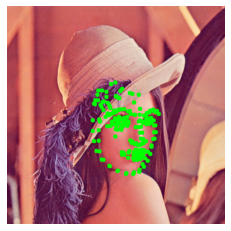

In [10]:
# 繪製特徵點
for p in landmarks2[0][0]:
    cv2.circle(image, tuple(p), 5, (0, 255, 0), -1)
    
# 顯示圖像
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.axis('off')
plt.show()